# Car classification problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
steps_to_take = [
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

# 1. Getting the data ready

In [4]:
cars = pd.read_csv('data/Car-Data-Set/Car Data Set/car.data')
cars

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   door      1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
cars.isna().sum()

buying      0
maint       0
door        0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Convert to numerical data

In [7]:
def to_num(df):
    for car in df:
        print(df[car].value_counts())

# Call the function
to_num(cars)

low      432
high     432
med      432
vhigh    432
Name: buying, dtype: int64
low      432
high     432
med      432
vhigh    432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    405
more      27
Name: door, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
big      576
small    576
med      576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


This shows that we have a categorical data

We have no data missing but if we look at our data, we have some text like 'more' on the persons column and 5more on the door column
let's assume that a car can take maximum of 5 people, so we replace more with 5 and a car can have a maximum of 5 door so, we replcae '5more' with 5

In [8]:
cars['persons'].replace('more', str(5), inplace=True)
cars['door'].replace('5more', str(5), inplace=True)

In [9]:
cars

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   door      1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
# shuffle our data
cars_shuffled = cars.sample(frac=1)

# split into X(Feature) and y(Label)
X = cars_shuffled.drop('class', axis=1)
y = np.array(cars_shuffled['class'])

now we convert to numerical data using `pd.get_dummies`

In [12]:
X = pd.get_dummies(cars_shuffled[['buying','maint','door','persons','lug_boot','safety']])
X.tail().T

,541,310,148,241,1643
buying_high,1,0,0,0,0
buying_low,0,0,0,0,1
buying_med,0,0,0,0,0
buying_vhigh,0,1,1,1,0
maint_high,1,0,1,0,0
maint_low,0,0,0,0,1
maint_med,0,1,0,1,0
maint_vhigh,0,0,0,0,0
door_2,1,0,0,1,1
door_3,0,0,1,0,0


# 2. Choose the right estimator/algorithm for our problems'


Following the sklearn algorithm map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html, let's try `LinearSVC()`, `KNeighborsClassifier()`, and `RandomForestClassifier()` model

# 3. Fit the model/algorithm and use it to make predictions on our data

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Split data into train and test set

In [14]:
# Algorithms
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Algorithms evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,plot_roc_curve

# Plotting using seaborn
import seaborn as sns

# Instantiate algorithms
models = {
    'LinearSVC':LinearSVC(),
    'KNeigborsClassifier':KNeighborsClassifier(),
    'RandomForestClassifier':RandomForestClassifier()
}

# Fit and train model function
def fit_and_train(models, x_train, x_test, y_train, y_test):
    np.random.seed(40)
    score = {}
    for k,model in models.items():
        model.fit(x_train, y_train)
        # data |= {'Linear Regression': } python 3.9
        score[k] = model.score(x_test, y_test)
    return score

In [15]:
# Fit and train model
model_scores = fit_and_train(models, X_train, X_test, y_train, y_test)
model_scores

{'LinearSVC': 0.8930635838150289,
 'KNeigborsClassifier': 0.9017341040462428,
 'RandomForestClassifier': 0.9682080924855492}

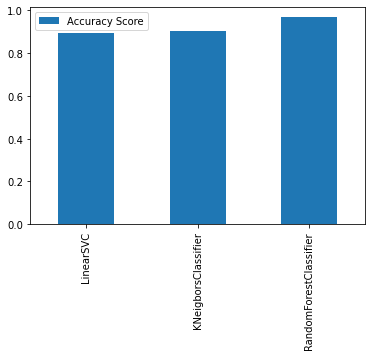

In [16]:
# Compare models by visualization
compare_model_scores = pd.DataFrame(model_scores, index=['Accuracy Score'])
compare_model_scores.T.plot(kind='bar');

In [17]:
# Get predictions for `RandomForestClassifier`
rclf = models['RandomForestClassifier']
y_preds = rclf.predict(X_test)

# 4. Evaluate `RandomForestClassifier` model

We want:

* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

In [20]:
# ROC Curve
plot_roc_curve(rclf, X_test, y_preds)

# We can't because we are not doing a binary classification

ValueError: RandomForestClassifier should be a binary classifier

In [21]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat = pd.crosstab(y_test, y_preds, rownames=['Actual'], colnames=['Predicted'])
conf_mat

Predicted,acc,good,unacc,vgood
Actual,,,,
acc,69,1,3,0
good,1,10,0,1
unacc,3,0,248,0
vgood,2,0,0,8


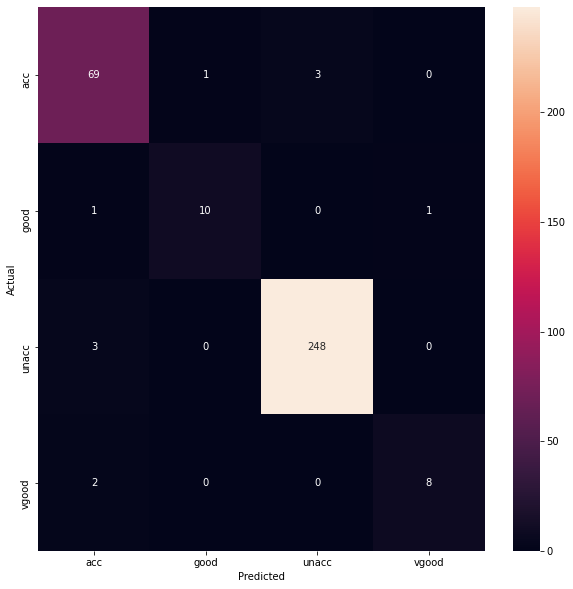

In [22]:
# Plot heat map of the confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(conf_mat, annot=True, fmt='g')

In [23]:
# Classification Report
class_rep = classification_report(y_test, y_preds)
print(class_rep)

              precision    recall  f1-score   support

         acc       0.92      0.95      0.93        73
        good       0.91      0.83      0.87        12
       unacc       0.99      0.99      0.99       251
       vgood       0.89      0.80      0.84        10

    accuracy                           0.97       346
   macro avg       0.93      0.89      0.91       346
weighted avg       0.97      0.97      0.97       346



# Save model

In [ ]:
import pickle
pickle.dump(rclf, open('car_classification_model.pkl', 'wb'))